## Dynamic Mode Decomposition Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def generate_data():
    s1 = np.sin(np.linspace(0, 50, 1000))
    s2 = np.cos(np.linspace(0, 20, 1000))
    x = np.tile(s1, (9,1))
    x = (x.T*np.array([1,2,3,4,5,4,3,2,1])).T
    y = np.tile(s2, (9,1))
    y = (y.T*np.array([1,2,3,4,5,4,3,2,1])).T
    x = np.concatenate((x, np.zeros((16,1000))), axis=0)
    y = np.concatenate((np.zeros((16,1000)), y), axis=0)
    out = x + y
    out = out + np.random.randn(*out.shape)*0.4
    return out

Make some data

In [ ]:
data = generate_data()
data.shape
plt.plot(data.T);

## PCA

In [67]:
X = data[:,:-1];
Y = data[:, 1:];
[U, S, Vh] = np.linalg.svd(X);
plt.plot(S,'*-');

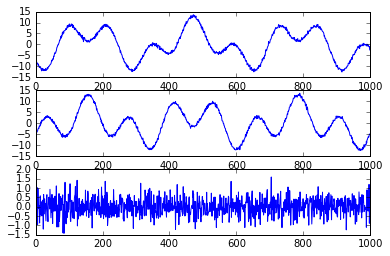

In [7]:
for i in range(3):
    plt.subplot(3,1,i+1);
    plt.plot(np.dot(X.T,U[:,i]));

## Using DMD with r=2 (=nk)

In [12]:
nk = 2
A_tilda = U[:,:nk].T.dot(Y).dot(Vh[:nk,:].T)/S[:nk]

In [26]:
A_evals, W = np.linalg.eig(A_tilda)

In [36]:
phi = Y.dot(Vh[:nk, :].T).dot(W)/S[:nk]

## Solving for z

In [ ]:
z = np.linalg.pinv(phi).dot(X[:,0])

## Reconstruction

In [44]:
Xhat0 = phi.dot(z)

## Spectrum

In [65]:
dt = 0.001 # sampling rate of 1KHz
f = np.imag(np.log(A_evals))/(2*np.pi)/dt
P = np.diag(phi.T.dot(phi))

<Container object of 3 artists>

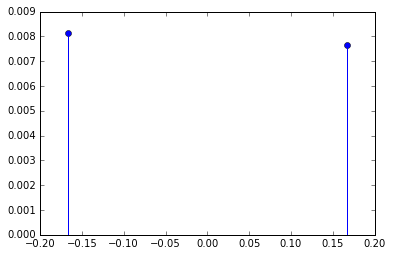

In [66]:
plt.stem(f, P)